C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


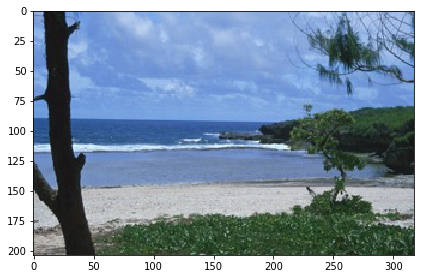

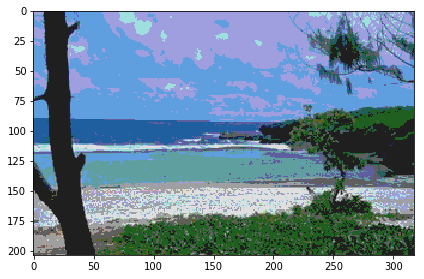

In [4]:
from skimage import io
import matplotlib.pyplot as plt  
import math

def posterize(image):  
    rows,cols,dims=image.shape  
    for i in range(0,rows):
        for j in range(0,cols):
            for k in range(0,3):  
                color = image[i,j,k]
                image[i,j,k] = math.floor(color/64)*64+31

    return image

img=io.imread('scene.jpg') 
io.imshow(img)
img2 = posterize(img) 
plt.figure()  
io.imshow(img2)  
io.show()



C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


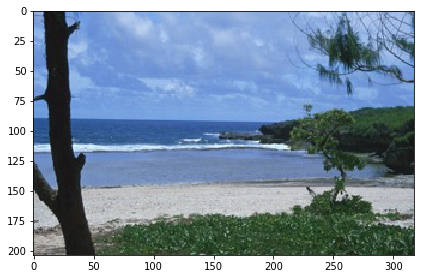

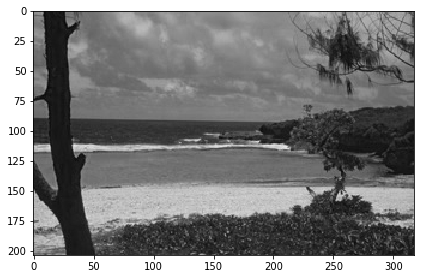

In [14]:
from skimage import io
import matplotlib.pyplot as plt  
import math

def grayPosterize(image):  
    rows,cols,dims=image.shape  
    ret_img = image[:,:,0]  
    for i in range(0,rows):
        for j in range(0,cols):
            luminance = (image[i,j,0]+image[i,j,1]+image[i,j,2])/3
            if (luminance<32):  
                ret_img[i,j] = 0
            else:
                ret_img[i,j] = 255
        return ret_img

img=io.imread('scene.jpg')  
io.imshow(img)

img2 = grayPosterize(img)  
plt.figure()  
io.imshow(img2)
io.show()


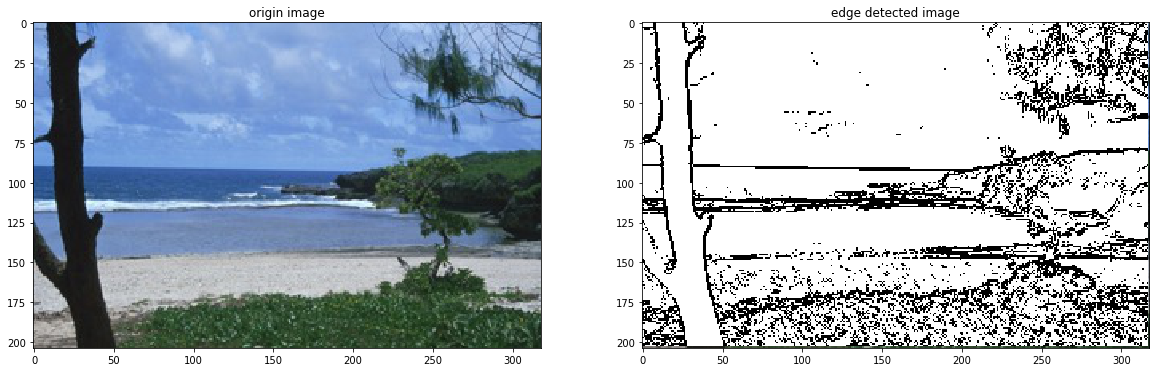

In [17]:
from skimage import io
import matplotlib.pyplot as plt

def edgeDetection(image,thre): 
    rows,cols,dims=image.shape 
    for i in range(0,rows-1):
        for j in range(0,cols-1):  
            sum = 0
            sum_rightBottom = 0
            for k in range(0,3):
                sum = sum + image[i,j,k]
                sum_rightBottom = sum_rightBottom + image[i+1,j+1,k]  
            dif = abs(sum_rightBottom - sum)
            if dif > thre:  
                value = 0
            else:
                value = 255
            for k in range(0,3): 
                image[i,j,k] = value
    return image

img=io.imread('scene.jpg')  
threshold = 50

plt.figure(num='scene', figsize=(20,20)) 

plt.subplot(1,2,1)
plt.title('origin image')  
plt.imshow(img)

img2 = edgeDetection(img, threshold)

plt.subplot(1,2,2)
plt.title('edge detected image') 
plt.imshow(img2)
plt.show()
